# Exercice 1
#### What Are LArge LAnguage Model (LLMs)?

1. Explain with your words what are LLMs and what they are designed for.

LLMs (Large Language Models) are deep learning models primarily based on transformers. They are designed to process, understand, and generate human language by leveraging vast amounts of textual data.

2. One popular LLMs is GPT (Generative Pretrained Transformer) which is known for powerful text generation capabilities. We will implement it. Copy/Paste this code to a colab notebook:

In [1]:
# Install necessary libraries
!pip install transformers matplotlib --quiet


In [1]:
# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

3. Now, we want to load a pretrained model and a tokeniner, fill in this partial code :

In [2]:
# 2. Loading a pretrained model and tokenizer
model_name =  "gpt2" # GPT-2 is used here for demonstration; can be replaced with models like "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



# Exercice 2:
### Transformer Architecture and Tokenization

1. Explain with your own words the process of tokenization. Create a new variable text that the sentence of your choice.

Tokenization is the process of breaking down a text into fragments called tokens. These fragments can be words, subwords, or characters, depending on the method used.

In [3]:
text = "Tokenization is the process of breaking down a text into fragments called tokens."

2. Tokenize the input text

In [5]:
# 2. Tokenize input text
tokens = tokenizer.tokenize(text)  # Obtenir les tokens
token_ids = tokenizer.convert_tokens_to_ids(tokens)  # Convertir les tokens en IDs


print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")  # Affiche les IDs des tokens


Original Text: Tokenization is the process of breaking down a text into fragments called tokens.
Tokens: ['Token', 'ization', 'Ġis', 'Ġthe', 'Ġprocess', 'Ġof', 'Ġbreaking', 'Ġdown', 'Ġa', 'Ġtext', 'Ġinto', 'Ġfragments', 'Ġcalled', 'Ġtokens', '.']
Token IDs: [30642, 1634, 318, 262, 1429, 286, 7163, 866, 257, 2420, 656, 21441, 1444, 16326, 13]


3. Visualize the tokenisation process.

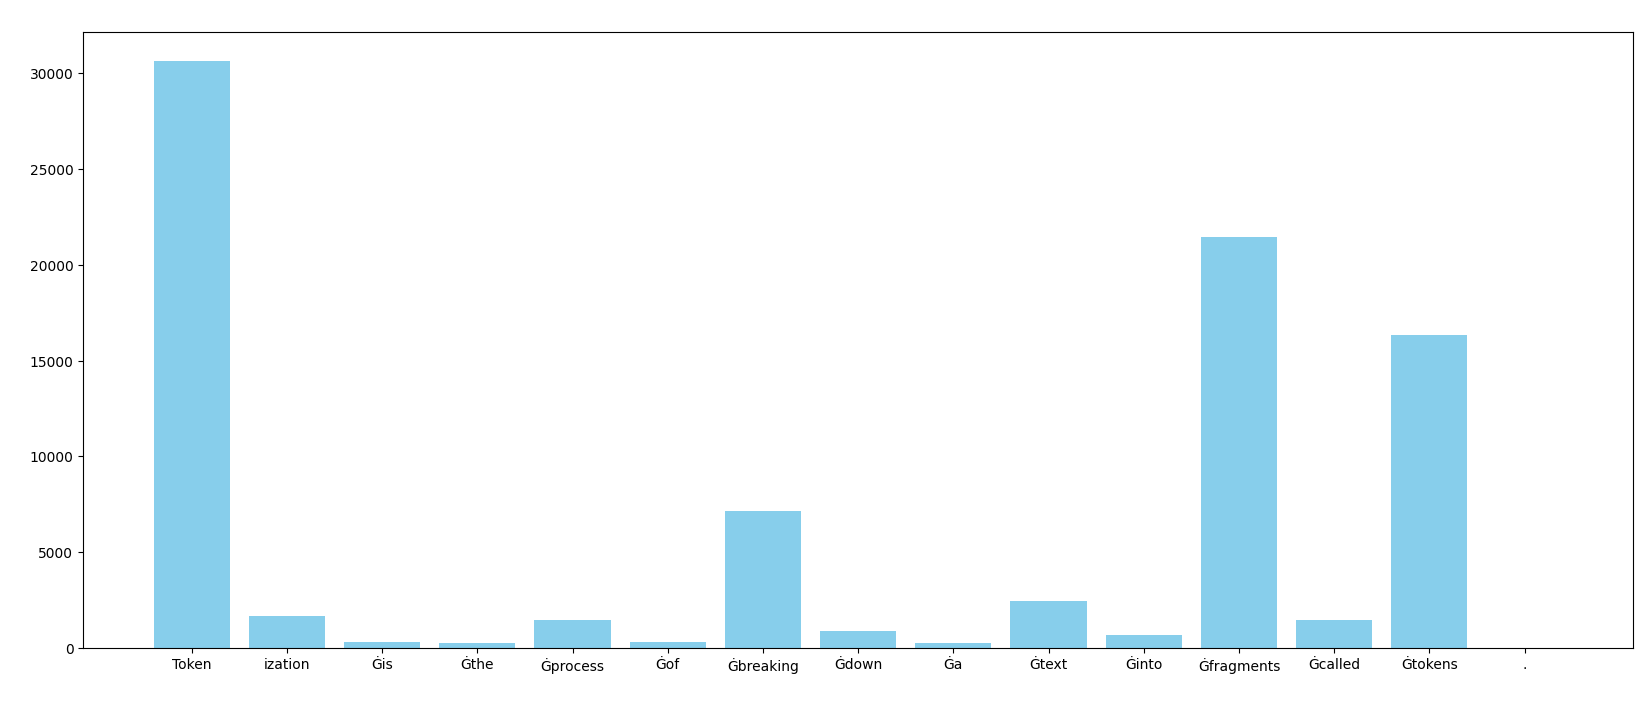

In [16]:
# 3. Visualizing the tokenization process
plt.figure(figsize=(20, 8))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel(" ")
plt.ylabel(" ")
plt.title(" ")
plt.show()


# Exercice 3:

### Understanding Token IDs and Special Prefixes

1. Print the ID of each tokens from text

In [7]:
# Print each token and its corresponding ID
for token, token_id in zip(tokens, token_ids):
    print(f"Token: {token} | Token ID: {token_id}")


Token: Token | Token ID: 30642
Token: ization | Token ID: 1634
Token: Ġis | Token ID: 318
Token: Ġthe | Token ID: 262
Token: Ġprocess | Token ID: 1429
Token: Ġof | Token ID: 286
Token: Ġbreaking | Token ID: 7163
Token: Ġdown | Token ID: 866
Token: Ġa | Token ID: 257
Token: Ġtext | Token ID: 2420
Token: Ġinto | Token ID: 656
Token: Ġfragments | Token ID: 21441
Token: Ġcalled | Token ID: 1444
Token: Ġtokens | Token ID: 16326
Token: . | Token ID: 13


The special prefix Ġ in tokenization indicates that the token represents the beginning of a new word following a space. Tokens without this prefix are either subwords or parts of a larger word. This technique is used to efficiently split words while maintaining meaningful linguistic units.

# Exercice 4:
### Pretraining vs. Fine-Tuning

Explain with your own words the two phases of Pretraining and FineTuning in Transformers.

Pretraining is the initial phase where a language model learns patterns, grammar, and word relationships from massive text corpora in an unsupervised way. This enables the model to generate coherent and contextually relevant text.
Fine-tuning, on the other hand, is a supervised training phase where the pretrained model is adapted to a specific task, using a smaller dataset tailored to that domain. Fine-tuning allows the model to specialize in areas such as medical text generation, sentiment analysis, or translation."



# Exercice 5:
### Generate Simple Text

1. Create a variable text with the sentence of your choice (another one)

In [8]:
input_text = "This is my second text created in this lesson"

   2. The model generates text by predicting the next word sequentially, based on the given input text (prompt). Generate output using the model.

In [10]:
# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

#  Generate text using the model
output_ids = model.generate(input_ids, max_length=50, num_return_sequences=1, do_sample=True)

# Decode the generated output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print the results
print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: This is my second text created in this lesson
Generated Output: This is my second text created in this lesson. Before I start writing, I thought if I want to get out of this lesson, I don't want you to read this one. Even if you know some people, you probably won't know I
